# Home Assignment No. 3

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


In [80]:
# Your imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

import warnings

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import Birch, SpectralClustering,AgglomerativeClustering

#Task 4. Anomaly detection
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

## Task 1 - Gaussian Processes (1 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [81]:
! pip install GPy==1.9.9

     |████████████████████████████████| 995 kB 5.4 MB/s 
     |████████████████████████████████| 71 kB 8.3 MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp37-cp37m-linux_x86_64.whl size=2627230 sha256=db14bb8624ae331b444413b5c84653e6bbff29f72a88f0dc64701e10b6da0b20
  Stored in directory: /root/.cache/pip/wheels/e4/05/38/b84c6bec7ea9dc623cdbdb6203b55b3abe7a7020a992f2064c
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=64834e54f4af6e3d353e3504f0ed18f4771586dbe38bbb4ae7351073e28b8273
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [83]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [84]:
data.dropna(inplace=True)

In [85]:
y = np.array(data.values)
X = np.array(data.index)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [87]:
### BEGIN SOLUTION (do not delete this comment!)
y_train = StandardScaler().fit_transform(y_train)
y_test = StandardScaler().fit_transform(y_test)
### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

Text(0, 0.5, 'Electricity consumption')

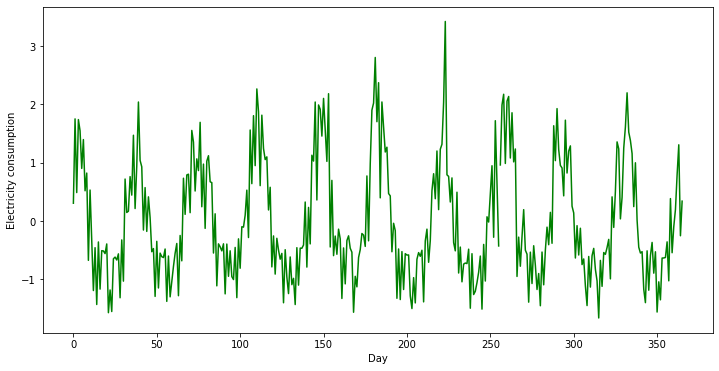

In [88]:
### BEGIN SOLUTION (do not delete this comment!)
  
plt.figure(figsize = (12, 6))
plt.plot(X_train, y_train, color = 'g')
plt.plot(X_test, y_test, color = 'g')
plt.xlabel('Day')
plt.ylabel('Electricity consumption')
    
### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction.

score:  0.7199798761335768
var:  4.111111111111111
lscale: 2.5


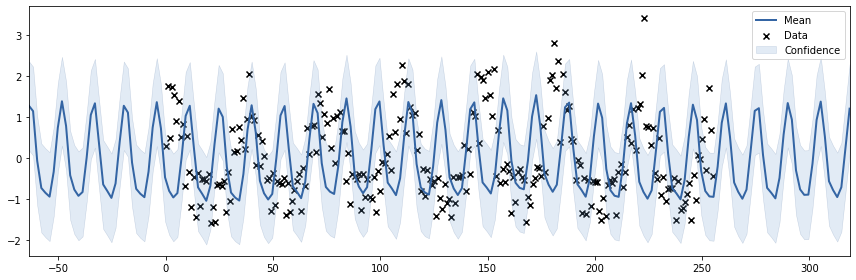

In [89]:
### BEGIN SOLUTION (do not delete this comment!)
import GPy
warnings.filterwarnings('ignore')
best_sc = 0
best_var = 0
best_lscale = 0

for lscale in np.linspace(1, 3, 5):
  for var in np.linspace(1, 5, 10):
    kernel = GPy.kern.RBF(1, var, lscale) + GPy.kern.Poly(1, var) + GPy.kern.StdPeriodic(1)
    gpr = GPy.models.GPRegression(X_train, y_train, kernel)
    gpr.optimize('lbfgs')
    score = r2_score(y_test, gpr.predict(X_test)[0])
    if score > best_sc:
      best_sc = score
      best_var = var
      best_lscale = lscale

print('score: ', best_sc)
print('var: ', best_var)
print('lscale:', best_lscale)

#Model with the best parameters
kernel = GPy.kern.RBF(1, best_var, best_lscale) + GPy.kern.Poly(1, best_var) + GPy.kern.StdPeriodic(1)
gpr = GPy.models.GPRegression(X_train, y_train, kernel)
gpr.optimize('lbfgs')

gpr.plot(figsize = (12, 4))
plt.legend(loc = 'upper right', prop = {'size': 10})
plt.show()
### END SOLUTION (do not delete this comment!))

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

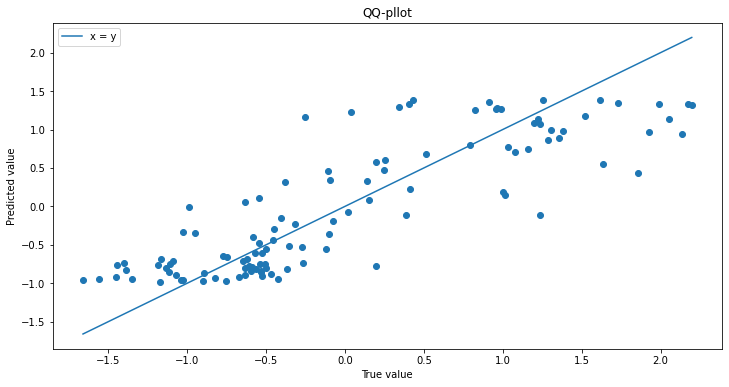

In [90]:

### BEGIN SOLUTION (do not delete this comment!)
plt.figure(figsize = (12, 6))
plt.plot(np.linspace(min(y_test), max(y_test), y_test.shape[0]), np.linspace(min(y_test), max(y_test), y_test.shape[0]), label = 'x = y')

plt.scatter(y_test, gpr.predict(X_test)[0])
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('QQ-pllot')
plt.legend(loc = 'upper left')
plt.show()

### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [91]:
### BEGIN SOLUTION (do not delete this comment!)
print('R2-score: ', r2_score(y_test, gpr.predict(X_test)[0]))
### END SOLUTION (do not delete this comment!)

R2-score:  0.7199798761335768


## Task 2 - MNIST, kMNIST component analysis and manifold learning. (5 pts.)

### Task 2.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [92]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

scaler = StandardScaler().fit(dg.data)
data = scaler.transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

100%|██████████| 7/7 [00:43<00:00,  6.24s/it]


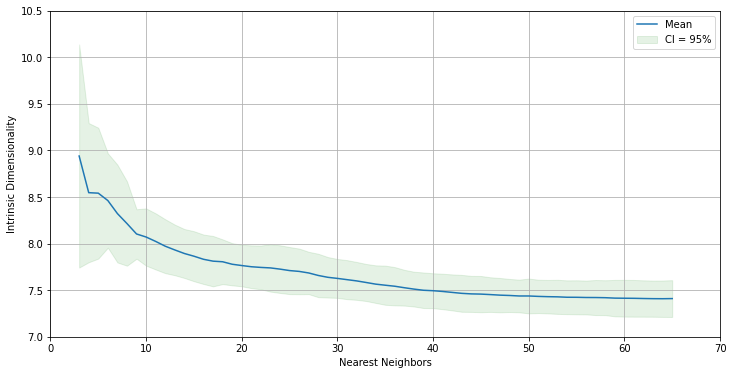

In [93]:
### BEGIN SOLUTION (do not delete this comment!)
#As in the given example: https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k

def repeated(func, X, nb_iter=100, random_state=None, verbose=0, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []

    iters = range(nb_iter)
    if verbose > 0:
        iters = tqdm(iters)    
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

rn_st = 20
intdim_k_rep = repeated(func = intrinsic_dim_scale_interval,
                                  X = data,
                                  nb_iter = 7,
                                  random_state = rn_st,
                                  verbose = 1,
                                  k1 = 1,
                                  k2 = 65)
intdim_k_rep = np.array(intdim_k_rep)
var = np.var(intdim_k_rep[:, 2:], axis = 0)
mean = np.mean(intdim_k_rep[:, 2:], axis = 0)
interv = scipy.stats.norm(mean, np.sqrt(var)).interval(0.95)

plt.figure(figsize = (12, 6))
plt.plot(np.arange(3, 66), mean, label = 'Mean')
plt.fill_between(np.arange(3, 66), *interv, alpha = 0.1, label = 'CI = 95%', color = 'g')
plt.xlim(0, 70)
plt.ylim(7, 10.5)
plt.xlabel('Nearest Neighbors')
plt.ylabel('Intrinsic Dimensionality')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()
### END SOLUTION (do not delete this comment!)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

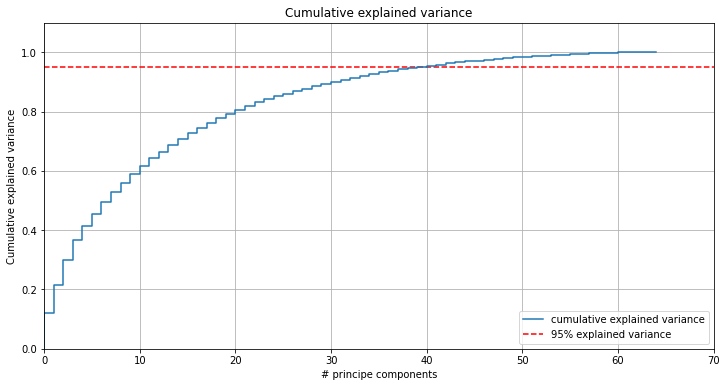

In [94]:
### BEGIN SOLUTION (do not delete this comment!)
components = np.arange(65)

eva = []
for n_comp in components:
    pca = PCA(n_components = n_comp).fit(data)
    eva.append(pca.explained_variance_ratio_.sum())

plt.figure(figsize = (12, 6))
plt.step(components, eva, label = 'cumulative explained variance')
plt.hlines(0.95, 0, 70, color = 'r', linestyle = '--', label = '95% explained variance')
plt.xlim(0, 70)
plt.ylim(0, 1.1)
plt.title('Cumulative explained variance')
plt.xlabel('# principe components')
plt.ylabel('Cumulative explained variance')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

### END SOLUTION (do not delete this comment!)

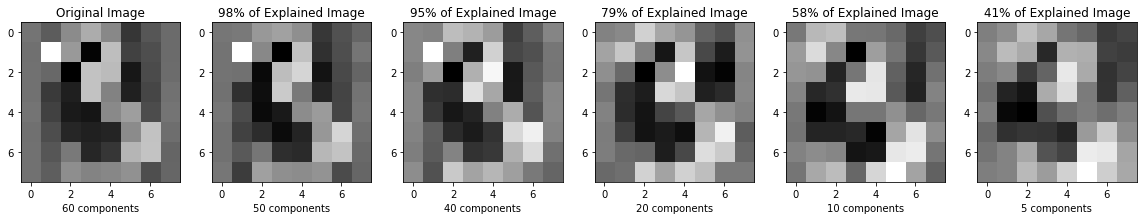

In [95]:
### BEGIN SOLUTION (do not delete this comment!)
fig, axes = plt.subplots(ncols = 6,
                         nrows = 1, figsize = (20, 5))
compots = [60, 50, 40, 20, 10, 5]

for cmot, ax in zip(compots, axes.ravel()):
  pca = PCA(cmot).fit(data)
  pro = pca.transform(data[3].reshape(1, -1))
  dec = pca.inverse_transform(pro)
  if cmot == 60:
    ax.set_title('Original Image')
  else: 
    ax.set_title(str(int(eva[cmot] * 100)) + '% of Explained Image')
  ax.set_xlabel(str(cmot) + ' components')
  ax.imshow(dec.reshape(8, 8), cmap = 'gist_gray')

### END SOLUTION (do not delete this comment!)


### Task 2.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [96]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [97]:
### BEGIN SOLUTION (do not delete this comment!)
rn_st = 42
final = {}
ttls = ['PCA',
        'FastICA',
        'Isomap']
ms = [PCA(8, random_state = rn_st),
          FastICA(8, max_iter = 500, random_state = rn_st),
          Isomap(n_components = 8, max_iter = 500, n_jobs = -1)]
lr = LogisticRegression(max_iter = 500, n_jobs = -1)
rkf = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = rn_st)

for mt, ttl in zip(ms, ttls):
  acc = []
  dat = mt.fit_transform(data)
  for train_index, test_index in rkf.split(dat):
    x_train, x_tets = dat[train_index], dat[test_index]
    y_train, y_test = dg.target[train_index], dg.target[test_index]
    
    lr.fit(x_train, y_train)
    acc.append(accuracy_score(y_test, lr.predict(x_tets)))
  print(ttl + ': ' + str(np.mean(acc)))
  final[ttl] = acc

### END SOLUTION (do not delete this comment!)


PCA: 0.8733080573609822
FastICA: 0.7150943980191891
Isomap: 0.9538042917569379


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. 

In [98]:
### BEGIN SOLUTION (do not delete this comment!)
from scipy.stats import ttest_ind

tts1 = ttest_ind(final['Isomap'], final['PCA'])
print('T test with alternative hypothesis that Isomap has greater accuracy than PCA')
print('Statistic: ', tts1[0], ' p_val: ', tts1[1])

print()

tts2 = ttest_ind(final['Isomap'], final['FastICA'])
print('T test with alternative hypothesis that Isomap has greater accuracy than ICA')
print('Statistic: ', tts2[0], ' p_val: ', tts2[1])

### END SOLUTION (do not delete this comment!)

T test with alternative hypothesis that Isomap has greater accuracy than PCA
Statistic:  12.808198555055938  p_val:  3.152665094626534e-13

T test with alternative hypothesis that Isomap has greater accuracy than ICA
Statistic:  22.359556734577968  p_val:  2.135137986096815e-19


### Task 2.3. (1 pt.)

3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)*

Comparing results obtained it can be seen that Isomap method yielded better accuracy than PCA and FastICA as it is non-linear. Isomap preserves the data's structure when transforming by keeping distances between point in manifold therefore performs better with non-linear datasets. 

PCA, ICA - linear methods. When acting PCA determines maximum variance directions by analyzing the data along them. ICA splits data into independent subcomponents.

*END SOLUTION (do not delete this comment!)*

### Task 2.4. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`. 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`. 

1) Get accuracy on test_set more than 93%.

In [99]:
import numpy as np

In [100]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [101]:
### BEGIN SOLUTION (do not delete this comment!)
rn_st = 42
knn = KNeighborsClassifier(n_jobs = -1).fit(x_train, y_train) #0.9133
print('Initial score: ', str(knn.score(x_test, y_test)))
compots = [5, 10, 20, 40, 60, 70]
best_sc = 0
best_cmot = 0
#ACCORDING TO RESULTS OBTAINED, THE BEST DIMRED METHOD - PCA
for cmot in compots:
  # THE BEST METHOD. SCORE = 0.9342, CMOT = 60
  pca = PCA(cmot, random_state = rn_st) 
  x_train_red = pca.fit_transform(x_train)
  x_test_red = pca.transform(x_test)

  #THE SCORE BECAME EVEN WORSE = 0.9111, CMOT = 40
  # fica = FastICA(cmot, max_iter = 500, random_state = rn_st) 
  # x_train_red = fica.fit_transform(x_train)
  # x_test_red = fica.transform(x_test)
  
  #ERROR. OUT OF MEMORY
  # ismp = Isomap(n_components = cmot, max_iter = 500, n_jobs = -1)
  # x_train_red = ismp.fit_transform(x_train)
  # x_test_red = ismp.transform(x_test)
  
  knn.fit(x_train_red, y_train)
  acc = knn.score(x_test_red, y_test)

  if acc > best_sc:
    best_sc = acc
    best_cmot = cmot
print('Best score: ', str(best_sc))
print('Method cmots: ', str(best_cmot))
### END SOLUTION (do not delete this comment!)

Initial score:  0.9133
Best score:  0.9342
Method cmots:  60


## Task 3 - Clustering (2 pts.)

### Task 3.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [102]:
import numpy as np

True number of clusters is 15


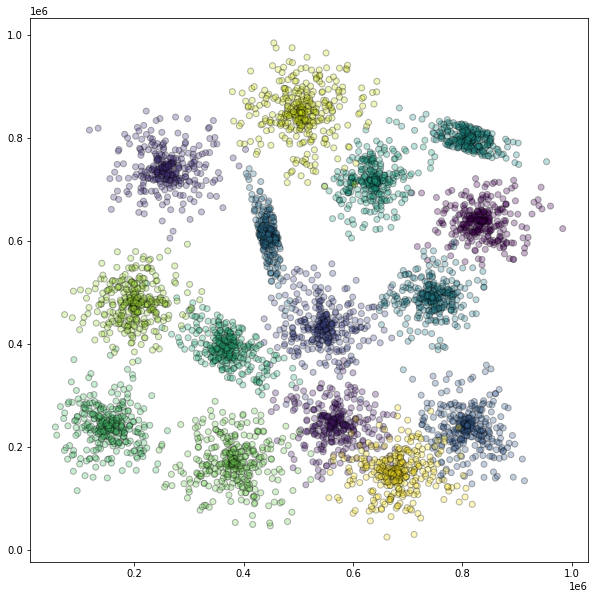

In [103]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [104]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

1) For each algorithm your task is to try to find the parameters leading to the best performance for n_clusters=true_number_of_clusters

In [105]:
### BEGIN SOLUTION (do not delete this comment!)
rn_st = 42
true_number_of_clusters = 15
grid_seacrh = {
    'init': ['k-means++', 'random'],
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'tol': [1e-5, 1e-3, 1e-2],
    'threshold': [0.1, 0.4, 1],
    'branching_factor': [8, 32, 55, 64],
    'affinity': ['euclidean', 'manhattan'],
    'linkage' : ['single', 'complete', 'average']
}

mls = [KMeans(n_clusters = true_number_of_clusters, random_state = rn_st),
       GaussianMixture(n_components = true_number_of_clusters, random_state = rn_st),
       AgglomerativeClustering(n_clusters = true_number_of_clusters),
       Birch(n_clusters = true_number_of_clusters, copy = False)]

for md in mls:
  isc_keys = md.get_params().keys() & grid_seacrh.keys()
  #Parameters intersection grid. Used to set only model-related parameters
  isc_par_grid = {}
  for key in isc_keys:
    isc_par_grid[key] = grid_seacrh[key]

  for param in ParameterGrid(isc_par_grid):
    best_silh = 0
    best_muti = 0
    best_model_silh = None
    best_model_muti = None
    md2 = md.set_params(**param)
    pred = md2.fit_predict(points)
    silh = silhouette_score(points, pred)
    # print(str(md2) + ' silh: ' + str(silh) + ' muti: ' + str(muti))
    muti = mutual_info_score(labels, pred)
    
    if silh > best_silh:
      best_silh = silh
      best_model_silh = md2
    if muti > best_muti:
      best_muti = muti
      best_model_muti = md2
  
  #IMPORTANT NOTE: default parameters are not displayed when displaying the best model.
  #E.g. 'init'='k-means++' for KMeans; 'covariance_type'='full' for GaussianMixture etc.
  print(str(type(md).__name__))
  print('  silhouette_score = ', best_silh)
  print('  ', best_model_silh)
  print()
  print('  mutual_info_score = ', best_muti)
  print('  ', best_model_muti)
  print()
### END SOLUTION (do not delete this comment!)

KMeans
  silhouette_score =  0.6261203639870667
   KMeans(init='random', n_clusters=15, random_state=42, tol=0.01)

  mutual_info_score =  2.5621479225778936
   KMeans(init='random', n_clusters=15, random_state=42, tol=0.01)

GaussianMixture
  silhouette_score =  0.61752687948172
   GaussianMixture(covariance_type='spherical', n_components=15, random_state=42,
                tol=0.01)

  mutual_info_score =  2.5405420347917786
   GaussianMixture(covariance_type='spherical', n_components=15, random_state=42,
                tol=0.01)

AgglomerativeClustering
  silhouette_score =  0.5646380723785954
   AgglomerativeClustering(affinity='manhattan', linkage='average', n_clusters=15)

  mutual_info_score =  2.4227329758499394
   AgglomerativeClustering(affinity='manhattan', linkage='average', n_clusters=15)

Birch
  silhouette_score =  0.6075939207380119
   Birch(branching_factor=64, copy=False, n_clusters=15, threshold=1)

  mutual_info_score =  2.5077832875665407
   Birch(branching_facto

2) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods. 

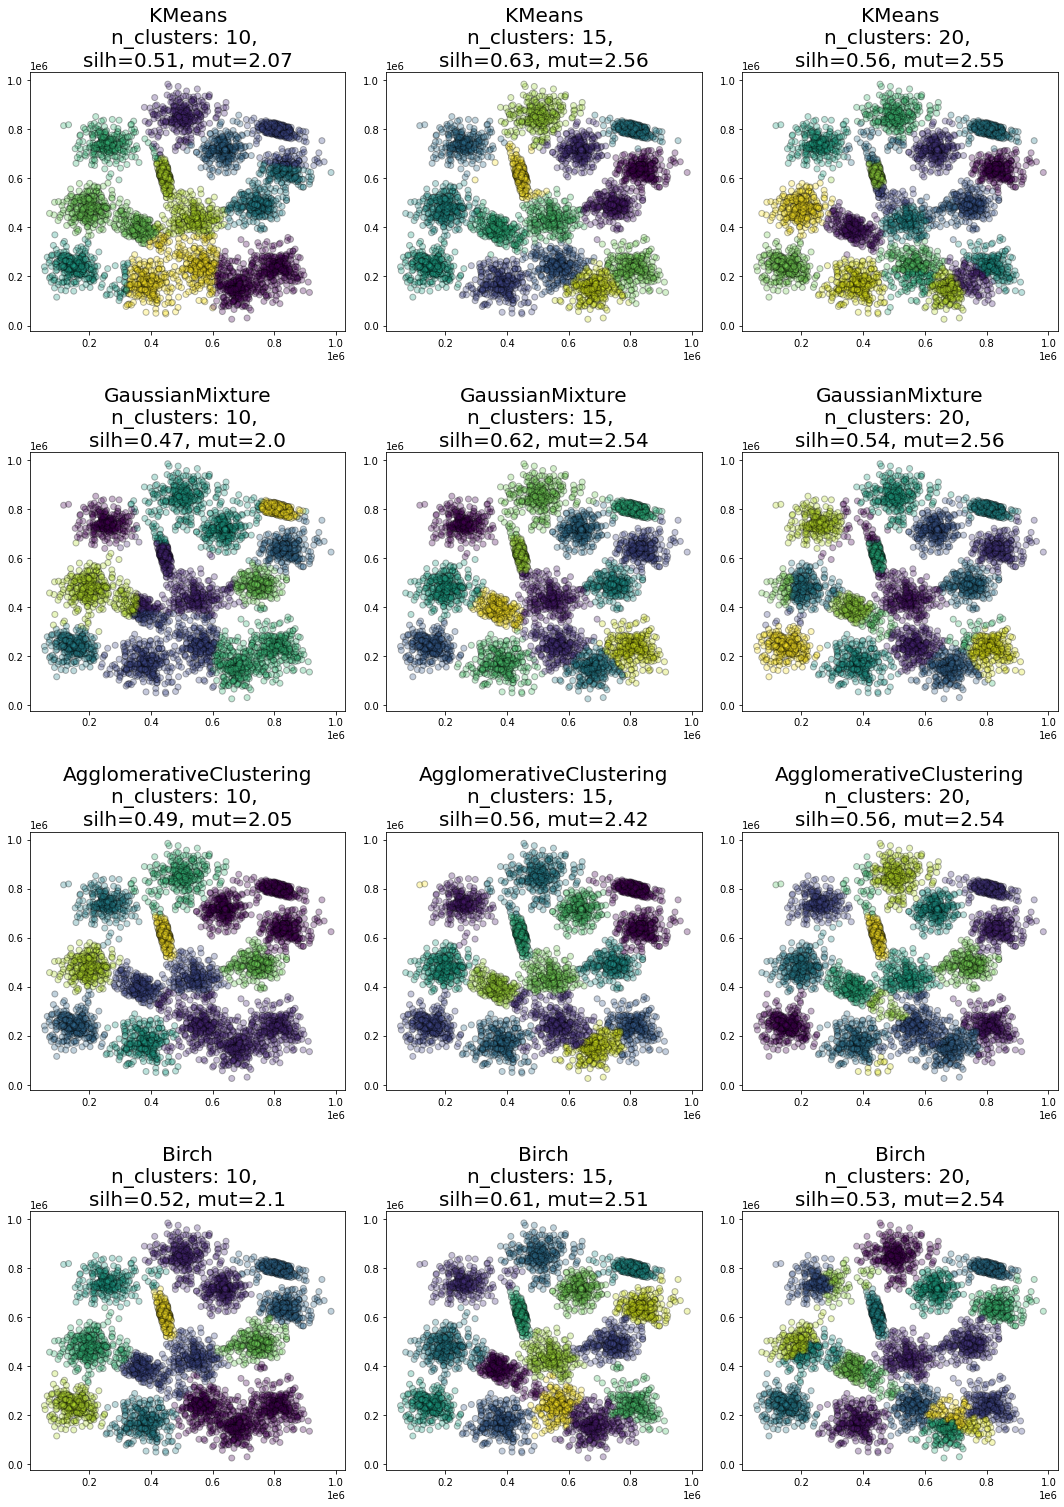

In [106]:
## BEGIN SOLUTION (do not delete this comment!)
number_of_clusters = [10, 15, 20]
preds = []

for noc in number_of_clusters:
#taking into account the best models obtained above
  mls2 = [KMeans(init='random', n_clusters=noc, random_state=42, tol=0.01), 
        GaussianMixture(covariance_type='spherical', n_components=noc, random_state=42, tol=0.01),
        AgglomerativeClustering(affinity='manhattan', linkage='average', n_clusters=noc),
        Birch(branching_factor=64, copy=False, n_clusters=noc, threshold=1)]
  for md in mls2:
    pred = md.fit_predict(points)
    silh = silhouette_score(points, pred)
    muti = mutual_info_score(labels, pred)
    pred_set = {'title': str(type(md).__name__), 'clusters': noc, 
                'pred': pred, 
                'silh': np.round(silh, 2), 'muti': np.round(muti, 2)
                }
    preds.append(pred_set)

fig, axes = plt.subplots(ncols = 3,
                         nrows = 4, figsize = (15, 20))
fig.tight_layout(w_pad = 1.0, h_pad = 10.0)

for num, pred in enumerate(preds):
    axes[num % 4][num // 4].scatter(points[:, 0], points[:, 1], c = pred['pred'], alpha = 0.3, edgecolor = 'k')
    axes[num % 4][num // 4].set_title(pred['title'] + '\n' + 
                             'n_clusters: '+ str(pred['clusters']) + ', ' + '\n'
                             'silh=' + str(pred['silh']) + ', ' +
                             'mut=' + str(pred['muti']), fontsize = 20
                             )
### END SOLUTION (do not delete this comment!)

2) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


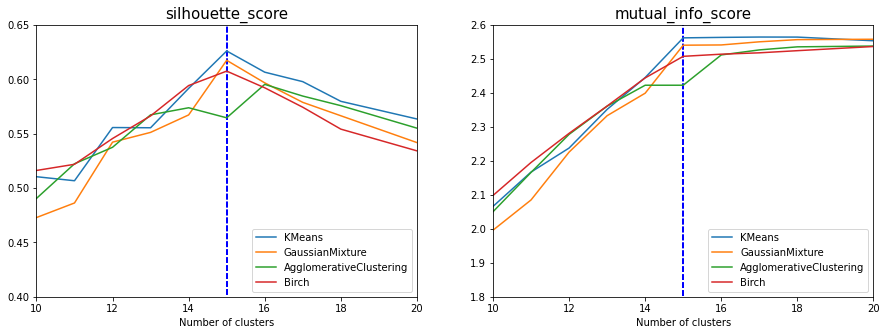

In [107]:
### BEGIN SOLUTION (do not delete this comment!)

mls3 = [KMeans(init='random', random_state=42, tol=0.01), 
        GaussianMixture(covariance_type='spherical', random_state=42, tol=0.01),
        AgglomerativeClustering(affinity='manhattan', linkage='average'),
        Birch(branching_factor=64, copy=False, threshold=1)]
fig, axes = plt.subplots(ncols = 2,
                         nrows = 1, figsize = (15, 5))
num_cts = list(np.linspace(10, 20, 10, dtype = np.int32))

for md in mls3:
  lsilh = []
  lmuti = [] 
  for num in (num_cts):
    #setting parameters
    if str(type(md).__name__) == 'KMeans':
      md.set_params(**{'n_clusters': num})
    elif str(type(md).__name__) == 'GaussianMixture':
      md.set_params(**{'n_components': num})
    elif str(type(md).__name__) == 'AgglomerativeClustering':
      md.set_params(**{'n_clusters': num})
    elif str(type(md).__name__) == 'Birch':
      md.set_params(**{'n_clusters': num})
    pred = md.fit_predict(points)
    lsilh.append(silhouette_score(points, pred))
    lmuti.append(mutual_info_score(labels, pred))

  axes[0].set_title('silhouette_score', fontsize = 15)
  axes[1].set_title('mutual_info_score', fontsize = 15)
  axes[0].set_xlabel('Number of clusters', fontsize = 10)
  axes[1].set_xlabel('Number of clusters', fontsize = 10)
  #true_val as vertical line and plots
  axes[0].vlines(15, 0, 0.7, color = 'b', linestyle = '--')
  axes[1].vlines(15, 0, 3, color = 'b', linestyle = '--')
  axes[0].plot(num_cts, lsilh, label = str(type(md).__name__))
  axes[1].plot(num_cts, lmuti, label = str(type(md).__name__))
  axes[0].legend(loc = 'lower right')
  axes[1].legend(loc = 'lower right')
  axes[0].set_xlim(xmin = 10, xmax = 20)
  axes[1].set_xlim(xmin = 10, xmax = 20)
  axes[0].set_ylim(ymin = 0.4, ymax = 0.65)
  axes[1].set_ylim(ymin = 1.8, ymax = 2.6)

### END SOLUTION (do not delete this comment!)

### Task 3.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__ 
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

In [108]:
### BEGIN SOLUTION (do not delete this comment!)
nsamp = 50
num_cls = list(np.linspace(10, 20, 10, dtype = np.int32))
sil_mean = [] 
sil_var = []

for ncl in num_cls:
  lsilh = []
  for i in range(nsamp):
    ind = np.random.choice(len(points), len(points), replace = True)
    pred = KMeans(random_state = 42, n_clusters = ncl).fit_predict(points[ind])
    silh = silhouette_score(points[ind], pred)
    lsilh.append(silh)

  sil_mean.append(np.mean(lsilh))
  sil_var.append(np.var(lsilh))
CI = scipy.stats.norm(sil_mean, np.sqrt(sil_var)).interval(0.95)

### END SOLUTION (do not delete this comment!)

2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

Number of clusters:  10
   Variance:  4.5934552158729666e-05
   Confidence interval:  [0.5051994322544646, 0.5317667573411033]
Number of clusters:  11
   Variance:  5.254574601462304e-05
   Confidence interval:  [0.5236110082005591, 0.5520259563453526]
Number of clusters:  12
   Variance:  3.0144959561004264e-05
   Confidence interval:  [0.5490706026572956, 0.5705927420309813]
Number of clusters:  13
   Variance:  1.7965790261365862e-05
   Confidence interval:  [0.5758743296656968, 0.5924893642392709]
Number of clusters:  14
   Variance:  1.7784591420836293e-05
   Confidence interval:  [0.604602940339656, 0.621133974860945]
Number of clusters:  15
   Variance:  2.0105415835288314e-05
   Confidence interval:  [0.6189701627749471, 0.6365467525470492]
Number of clusters:  16
   Variance:  2.6627500491107286e-05
   Confidence interval:  [0.6009395750553523, 0.6211671252416306]
Number of clusters:  17
   Variance:  3.079758760786279e-05
   Confidence interval:  [0.5808954903307677, 0.602649

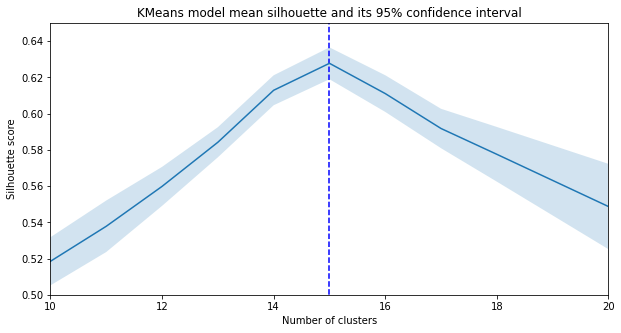

In [109]:
### BEGIN SOLUTION (do not delete this comment!)

for n, num in zip(range(len(num_cls)), num_cls):
    print('Number of clusters: ', str(num))
    print('   Variance: ', str(sil_var[n]))
    print('   Confidence interval: ', str([CI[0][n], CI[1][n]]))

plt.figure(figsize = (10, 5))
plt.vlines(15, 0, 1, color = 'b', linestyle = '--')
plt.plot(num_cls, sil_mean)
plt.fill_between(num_cls, *CI, alpha = 0.2)
plt.xlim([10, 20])
plt.ylim([0.5, 0.65])
plt.title('KMeans model mean silhouette and its 95% confidence interval')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

### END SOLUTION (do not delete this comment!)

## Task 4. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 4.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the **test** set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [75]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [76]:
### BEGIN SOLUTION (do not delete this comment!)
  
# impurity estimation on test data
zrs = len(test_y[test_y == 0]) 
ons = len(test_y[test_y == 1])
contamination = ons/zrs
test_y = test_y.replace({1: -1, 0: 1})

### END SOLUTION (do not delete this comment!)

In [77]:
### BEGIN SOLUTION (do not delete this comment!)

# Choose three anomaly detection models
warnings.filterwarnings('ignore')
for ch in [0.1, 1, 10]:
    # >>> your solution here <<<
    rn_st = 42
    anomaly_det = [svm.OneClassSVM(nu = ch * contamination),
                   IsolationForest(contamination = ch * contamination, n_jobs = -1, random_state = rn_st),
                   LocalOutlierFactor(contamination = ch * contamination, novelty = True, n_jobs = -1)]
    print('\nContamination: ', np.round(ch * contamination, 3))
    for _, det in enumerate(anomaly_det):
      det.fit(train_X)
      labels_isolation = det.predict(test_X)
      print(str(type(det).__name__) + '. ' +
          'ROC/AUC = ' + str(np.round(roc_auc_score(test_y, labels_isolation), 3)) + '; ' +
          'Precision = ', str(np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3)))
### END SOLUTION (do not delete this comment!)


Contamination:  0.002
OneClassSVM. ROC/AUC = 0.499; Precision =  0.98
IsolationForest. ROC/AUC = 0.541; Precision =  0.984
LocalOutlierFactor. ROC/AUC = 0.499; Precision =  0.981

Contamination:  0.017
OneClassSVM. ROC/AUC = 0.487; Precision =  0.957
IsolationForest. ROC/AUC = 0.772; Precision =  0.986
LocalOutlierFactor. ROC/AUC = 0.499; Precision =  0.961

Contamination:  0.172
OneClassSVM. ROC/AUC = 0.509; Precision =  0.824
IsolationForest. ROC/AUC = 0.872; Precision =  0.847
LocalOutlierFactor. ROC/AUC = 0.513; Precision =  0.812


### Task 4.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance. 


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [78]:
### BEGIN SOLUTION (do not delete this comment!)

# choose your favorite classifier, e.g. from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = [] 
pr_score = []

for train_index, test_index in skf.split(test_X, test_y):
    # >>> your solution here <<<
    # Part of Test as train, another as test. Data conversions are done accordingly
    md = DecisionTreeClassifier(max_depth = 3, random_state = 42).fit(test_X.iloc[train_index], 
                                                                      test_y.iloc[train_index].replace({-1: 1, 1: 0}))
    pred = md.predict(test_X.iloc[test_index])

    roc_auc_scores.append(roc_auc_score(test_y.iloc[test_index].replace({-1: 1, 1: 0}), pred))
    pr_score.append(precision_score(test_y.iloc[test_index].replace({-1: 1, 1: 0}), pred))

print('ROC/AUC mean: ', np.mean(roc_auc_scores), '; std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_score), '; std: ', np.std(pr_score))
### END SOLUTION (do not delete this comment!)

ROC/AUC mean:  0.8694730664689894 ; std:  0.06378896347768657
Precision mean:  0.9349999999999999 ; std:  0.10012492197250392


Try to enhance the classifier performance using Anomaly detection methods

In [79]:
### BEGIN SOLUTION (do not delete this comment!)

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = [] 
pr_score = []

anomaly_det1 = [svm.OneClassSVM(nu = contamination),
                   IsolationForest(contamination = contamination, n_jobs = -1, random_state = rn_st),
                   LocalOutlierFactor(contamination = contamination, novelty = True, n_jobs = -1)]
for train_index, test_index in skf.split(test_X, test_y):
    # >>> your solution here <<<
    det_pred = np.zeros(len(test_index), dtype = np.int32)
    md = DecisionTreeClassifier(max_depth = 3, random_state = 42).fit(test_X.iloc[train_index], 
                                                                      test_y.iloc[train_index].replace({-1: 1, 1: 0}))
    pred_md = md.predict(test_X.iloc[test_index])

    for det in anomaly_det1:
        det.fit(pd.concat([train_X, test_X.iloc[train_index]], axis = 0))
        det_pred = det_pred | det.predict(test_X.iloc[test_index]) # or
    pred = pred_md & det_pred #and
    
    roc_auc_scores.append(roc_auc_score(
        test_y.replace({-1: 1, 1: 0}).iloc[test_index], 
        pred))
    pr_score.append(precision_score(
        test_y.replace({-1: 1, 1: 0}).iloc[test_index], 
        pred, average = 'micro'))
print('ROC/AUC mean: ', np.mean(roc_auc_scores), '; std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_score), '; std: ', np.std(pr_score)) 
### END SOLUTION (do not delete this comment!)

ROC/AUC mean:  0.8694730664689894 ; std:  0.06378896347768657
Precision mean:  0.994469633695263 ; std:  0.002289865797143517


Write 1-2 sentences on your findings.

*BEGIN SOLUTION (do not delete this comment!)*

As my favorite classifier I've chosen DecisionTreeClassifier. By the way, this model itself is suitable for outlier detection, as all the anomaly detection algorithms used in this task. Probably that's why ROC/AUC still the same after combining them. In addition, one of the algorithms, IsolationForest, is based on Decision trees. Most likely, a significant increase is possible with proper selection of the used methods hyperparameters and types of feature engineering.

But I've achieved a noticeable increase in Precision. This fact shows that the indicated combination of models makes it possible to determine better (std decreased) and isolate anomalies in the dataset.

*END SOLUTION (do not delete this comment!)*